# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [69]:
data = pd.read_csv("/content/Customers.csv")
df = pd.DataFrame(data)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [71]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


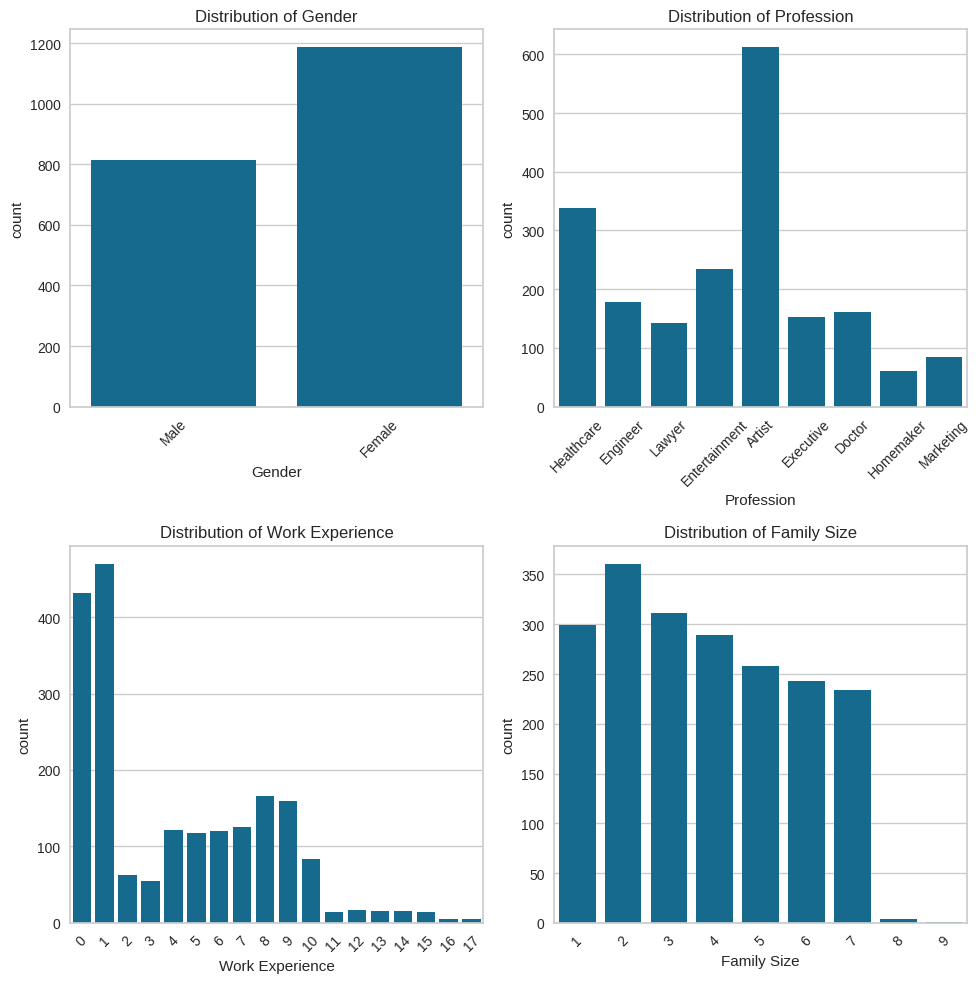

In [72]:
col = ['Gender','Profession', 'Work Experience', 'Family Size']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, col in enumerate(col):
    sns.countplot(x=col, data=df, ax=axs[i])
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [73]:
# Mengisi nilai yang hilang pada kolom 'Profession' dengan modus
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

In [74]:
df.duplicated().sum()

0

In [75]:
df_encoded = df.copy()
df_encoded['Gender'] = lb.fit_transform(df_encoded['Gender'])
df_encoded['Profession'] = lb.fit_transform(df_encoded['Profession'])

mengubah data kategorikal menjadi numerik

**Gender**
- Female = 0
- Male = 1

**Profession**
- Artist = 0
- Doctor = 1
- Engineer = 2
- Entertainment = 3
- Executive = 4
- Healthcare = 5
- Homemaker = 6
- Lawyer = 7
- Marketing = 8

In [76]:
df_encoded=df_encoded.drop(columns=['CustomerID'])
df_encoded

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...
1995,0,71,184387,40,0,8,7
1996,0,91,73158,32,1,7,7
1997,1,87,90961,14,5,9,2
1998,1,77,182109,4,4,7,2


menghapus kolom yang tidak digunakan

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [77]:
X = df_encoded.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values

print(pd.DataFrame(X, columns=['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']))

      Gender  Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0          1   19              15000                      39           5   
1          1   21              35000                      81           2   
2          0   20              86000                       6           2   
3          0   23              59000                      77           7   
4          0   31              38000                      40           3   
...      ...  ...                ...                     ...         ...   
1995       0   71             184387                      40           0   
1996       0   91              73158                      32           1   
1997       1   87              90961                      14           5   
1998       1   77             182109                       4           4   
1999       1   90             110610                      52           3   

      Work Experience  Family Size  
0                   1            4  
1            

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

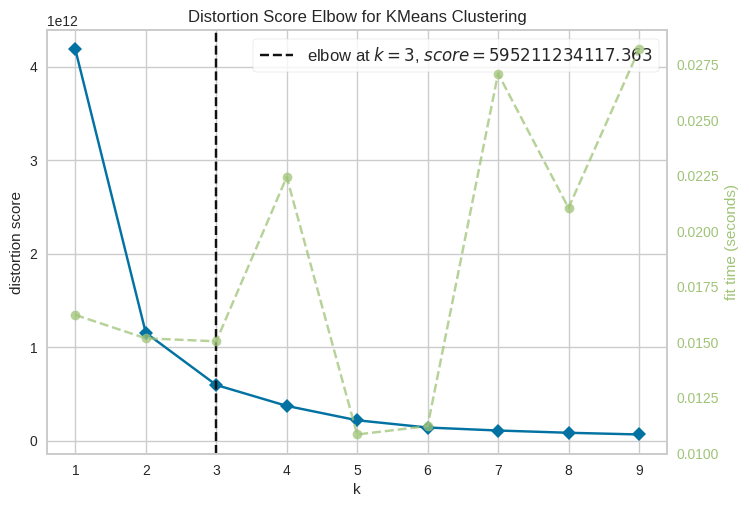

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
kmeans = KMeans()
cluster = KElbowVisualizer(kmeans, k=(1, 10))
cluster.fit(X)
cluster.show()

In [79]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.56


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [80]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menggunakan pseudo-label dari K-Means sebagai target sementara
pseudo_labels = kmeans.labels_

# Inisialisasi Lasso untuk seleksi fitur
alpha = 0.035
lasso = Lasso(alpha=alpha)
lasso.fit(X_scaled, pseudo_labels)

# Mendapatkan koefisien Lasso
coef = lasso.coef_

# Seleksi fitur berdasarkan koefisien != 0
selected_features = np.where(coef != 0)[0]
print("Indeks fitur yang dipilih:", selected_features)

# Jika menggunakan DataFrame, mendapatkan nama kolom fitur terpilih
if isinstance(X, pd.DataFrame):
    selected_columns = X.columns[selected_features]
    print("Nama kolom fitur yang dipilih:", selected_columns)

Indeks fitur yang dipilih: [1 2]


In [81]:
X = df_encoded.iloc[:, [1, 2]].values

print(pd.DataFrame(X, columns=['Age', 'Annual Income ($)']))

      Age  Annual Income ($)
0      19              15000
1      21              35000
2      20              86000
3      23              59000
4      31              38000
...   ...                ...
1995   71             184387
1996   91              73158
1997   87              90961
1998   77             182109
1999   90             110610

[2000 rows x 2 columns]


In [82]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.56


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

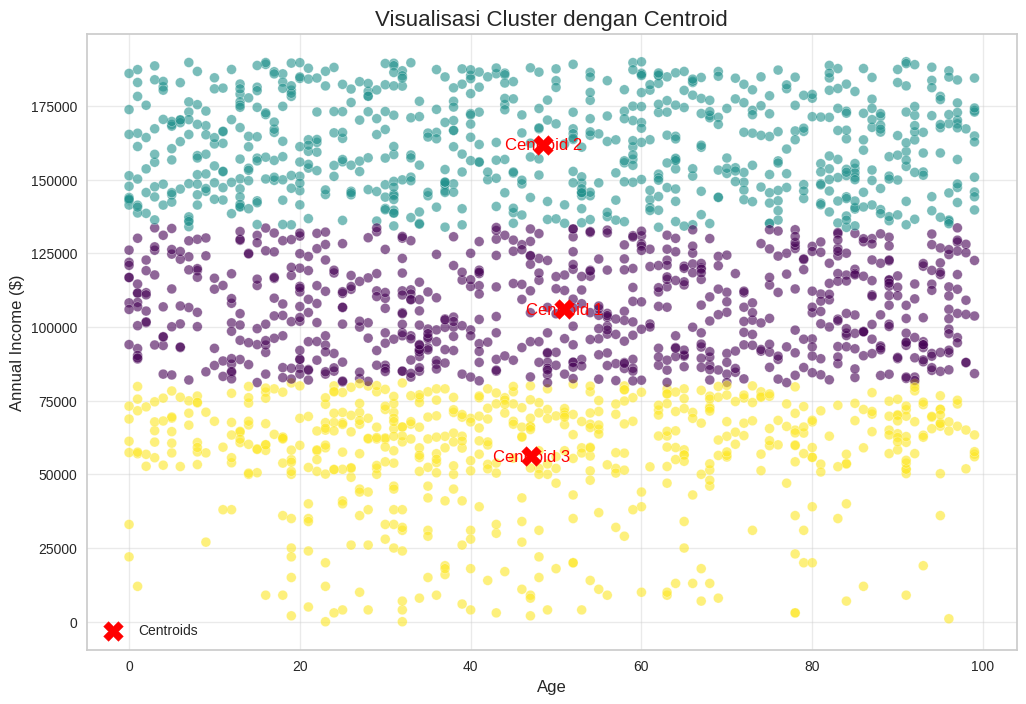

Nilai Centroids:
Centroid 1: Rata - Rata Age = 50.94, Rata - Rata Annual Income ($) = 105,924.60
Centroid 2: Rata - Rata Age = 48.52, Rata - Rata Annual Income ($) = 161,599.80
Centroid 3: Rata - Rata Age = 47.09, Rata - Rata Annual Income ($) = 56,080.47


In [83]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menyesuaikan judul dan label sumbu
plt.title('Visualisasi Cluster dengan Centroid', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.4)

# Menampilkan plot
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Rata - Rata Age = {centroid[0]:,.2f}, Rata - Rata Annual Income ($) = {centroid[1]:,.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
  - **Rata-rata Age:** 50.94 tahun
  - **Rata-rata Annual Income:** USD 105,924.60
  - **Interpretasi:** Cluster ini terdiri dari individu dengan usia rata-rata yang lebih tinggi dibandingkan cluster lainnya. Kelompok ini cenderung memiliki pendapatan tahunan yang cukup tinggi tetapi tidak setinggi Cluster 2. Mereka kemungkinan mewakili segmen masyarakat yang berada pada fase karier matang, seperti manajerial senior atau profesional mapan.
2. Cluster 2:
  - **Rata-rata Age:** 48.52 tahun
  - **Rata-rata Annual Income:** USD 161,599.80
  - **Interpretasi:** Cluster ini memiliki pendapatan tahunan tertinggi, meskipun rata-rata usia mereka sedikit lebih muda dibandingkan Cluster 1. Kelompok ini mungkin terdiri dari individu berpenghasilan tinggi, seperti eksekutif atau pengusaha sukses, yang berada pada puncak karier mereka. Mereka mungkin memiliki akses ke sumber daya ekonomi yang signifikan.
3. Cluster 3:
  - **Rata-rata Age:** 47.09 tahun
  - **Rata-rata Annual Income:** USD 56,080.47
  - **Interpretasi:** Cluster ini memiliki rata-rata usia paling muda dan pendapatan tahunan terendah di antara ketiga cluster. Mereka kemungkinan terdiri dari pekerja kelas menengah, karyawan tingkat awal hingga menengah, atau individu dengan tanggung jawab finansial yang lebih rendah.

In [84]:
df_encoded['Cluster'] = kmeans.labels_
df_encoded

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,19,15000,39,5,1,4,2
1,1,21,35000,81,2,3,3,2
2,0,20,86000,6,2,1,1,0
3,0,23,59000,77,7,0,2,2
4,0,31,38000,40,3,2,6,2
...,...,...,...,...,...,...,...,...
1995,0,71,184387,40,0,8,7,1
1996,0,91,73158,32,1,7,7,2
1997,1,87,90961,14,5,9,2,0
1998,1,77,182109,4,4,7,2,1


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [85]:
df_encoded.to_csv("data_clustering.csv", index=False)